# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib as plt

❓ Load the CSV data as a into a `titanic_df` variable.

the csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [6]:
# YOUR CODE HERE
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv"
titanic_df = pd.read_csv(url)

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [7]:
# YOUR CODE HERE
titanic_df.shape

(891, 12)

In [8]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic_df.describe()
# Missing values in age column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.info()
# Lots of missing values in Cabin column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [15]:
# YOUR CODE HERE
titanic_df.drop(columns="Cabin", inplace=True)
# Show documentation, columns or index as labels, can pass single column or list, need to use inplace=True

In [16]:
titanic_df.columns
# check for column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [29]:
# YOUR CODE HER
# first show series and then show how to convert to DF
pclass_df = titanic_df.groupby("Pclass")[["PassengerId"]].count() # or to_frame(name="count")
pclass_df

,PassengerId
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

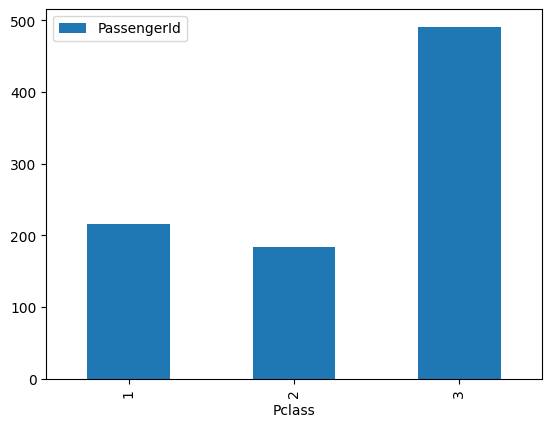

In [25]:
# YOUR CODE HERE
pclass_df.plot(kind="bar");

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

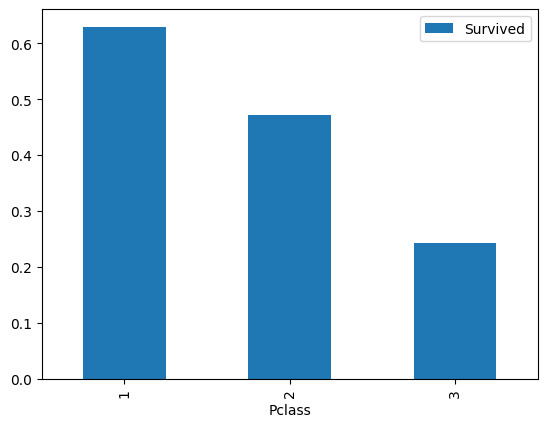

In [61]:
# YOUR CODE HERE
# mean() since we want a frequency
# work only with columns of interest
titanic_df[["Pclass", "Survived"]].groupby("Pclass").mean().plot(kind="bar");

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [38]:
# YOUR CODE HERE
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

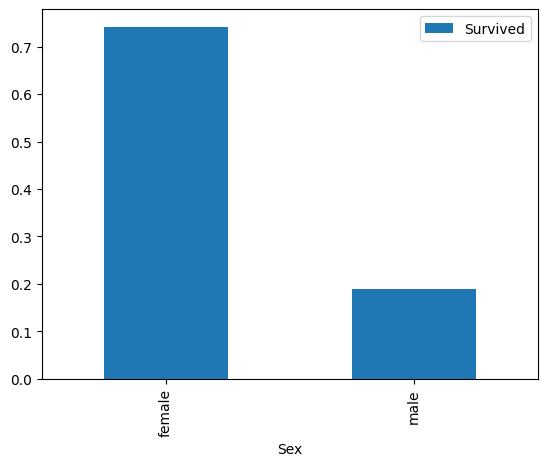

In [66]:
# YOUR CODE HERE
titanic_df[["Sex", "Survived"]].groupby("Sex").mean().plot(kind="bar");

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

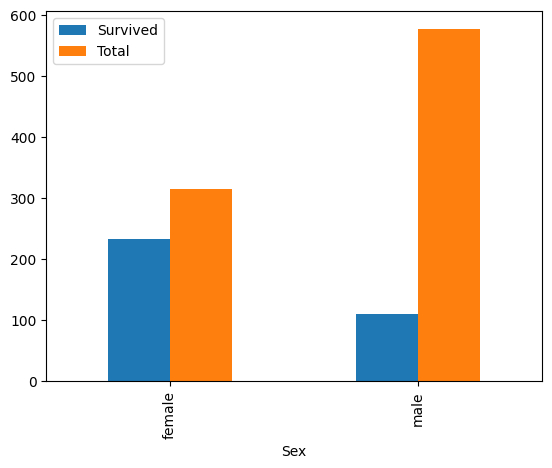

In [91]:
# YOUR CODE HERE
survivors_df = titanic_df[["Survived", "Sex"]].groupby("Sex").sum()
survivors_df["Total"] = titanic_df[["Survived", "Sex"]].groupby("Sex").count()
survivors_df.plot(kind="bar");

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [92]:
# YOUR CODE HERE
children_df = titanic_df[titanic_df["Age"] < 18]
children_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S


❓ How many children were there in the Titanic?

In [93]:
# YOUR CODE HERE
children_df.shape[0]

113

❓ How many children survived?

In [94]:
# YOUR CODE HERE
children_df["Survived"].sum() # vs children_df.Survived

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [95]:
# YOUR CODE HERE
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


In [96]:
survivors_df.loc["children"] = [children_df["Survived"].sum(), children_df.shape[0]]
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [102]:
children_survived_df = children_df[["Survived", "Sex"]].groupby("Sex").sum()
children_survived_df["Total"] = children_df[["Survived", "Sex"]].groupby("Sex").count()
children_survived_df.loc["children"] = [0,0]
children_survived_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


In [103]:
(survivors_df - children_survived_df).plot(kind="bar")

,Survived,Total
Sex,,
female,195,259
male,86,519
children,61,113


## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [116]:
# YOUR CODE HERE
titanic_df["family_size"] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_df
titanic_df.groupby("family_size").mean()["Survived"]

family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [124]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,Mr


In [125]:
# YOUR CODE HERE

def get_title(name):
    return name.split(',')[1].split('.')[0].strip()


titanic_df['Title'] = titanic_df['Name'].apply(get_title)

In [126]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)